<a href="https://colab.research.google.com/github/RisaRules6762/protein-RMSD-project/blob/data-cleaning/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values per column:
 RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64


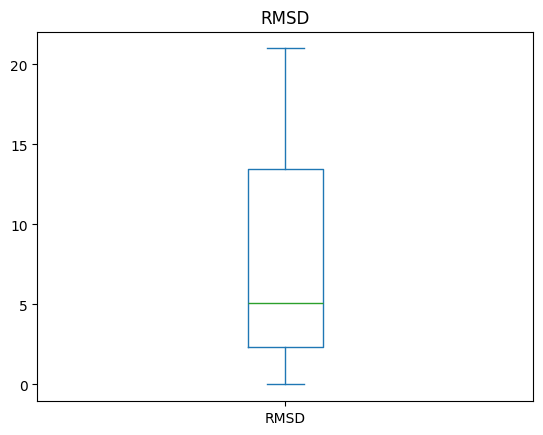

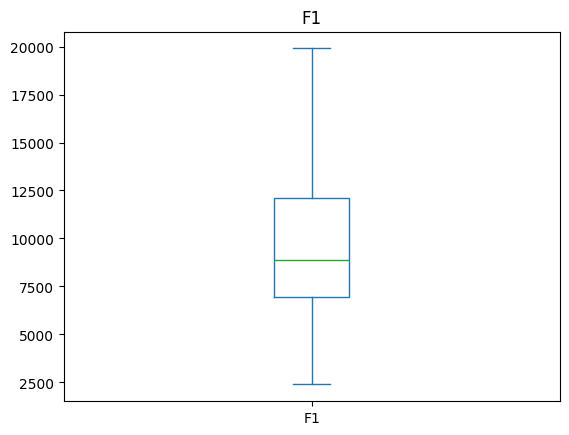

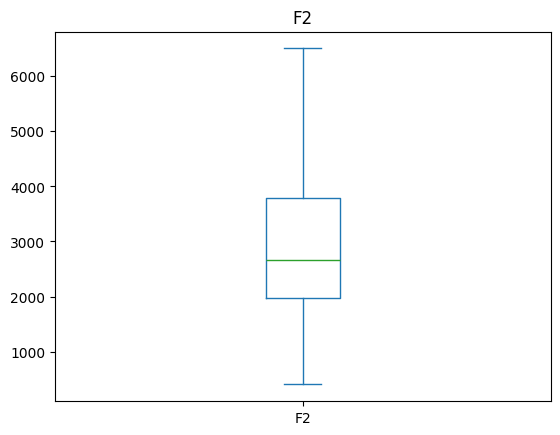

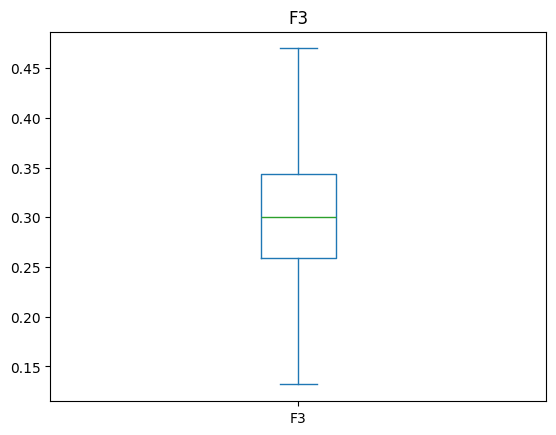

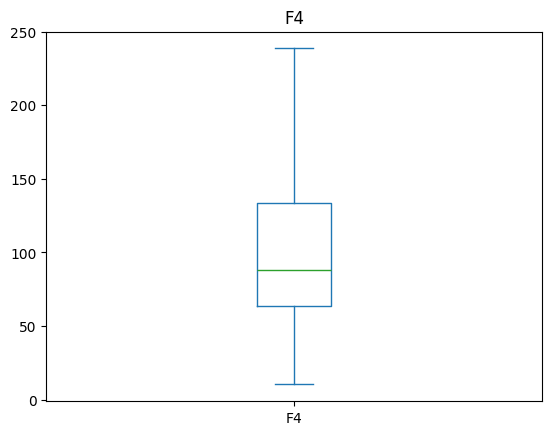

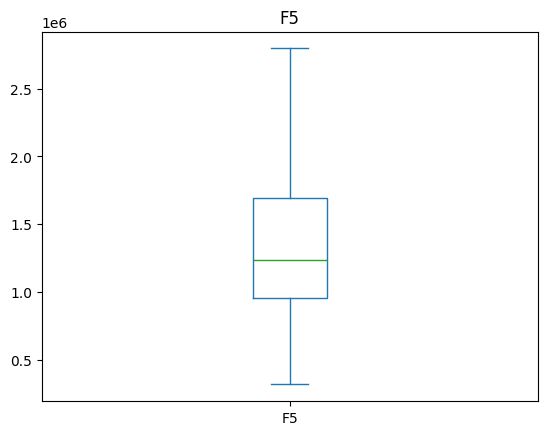

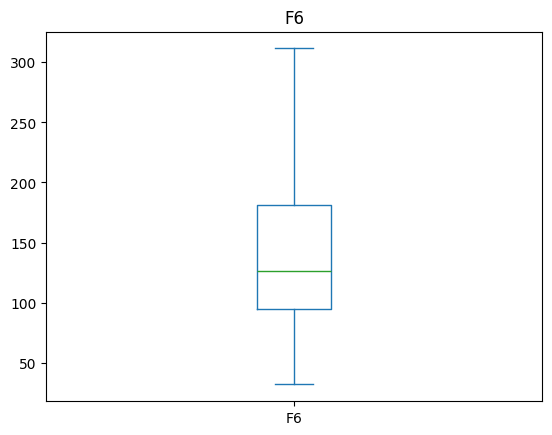

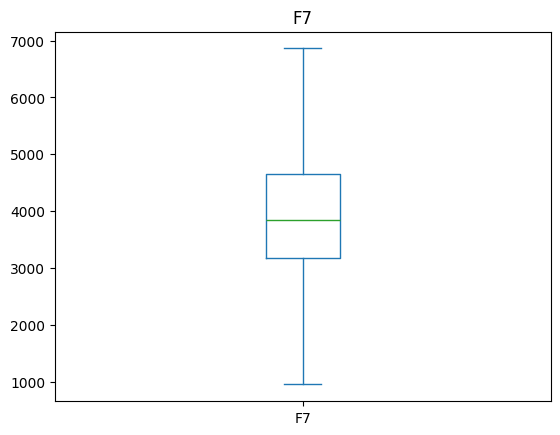

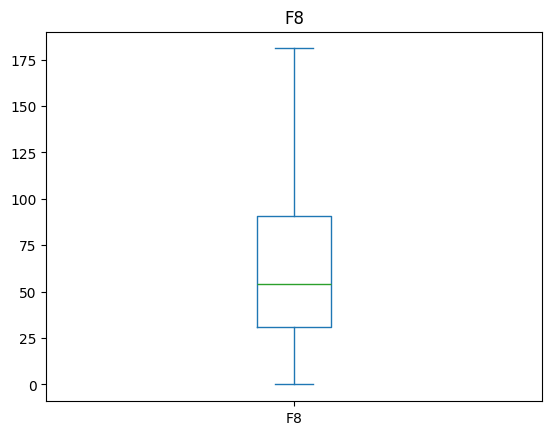

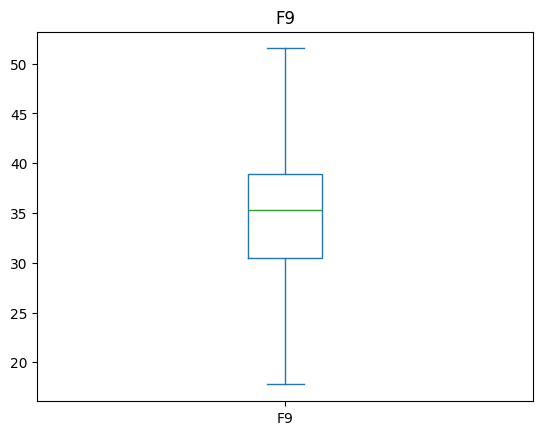

Data cleaning complete. Saved as 'cleaned_dataset.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


# Load dataset
df = pd.read_csv('proteinstructure.zip')

# 1. Check for Missing Values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with too many missing values (threshold can be adjusted)
df = df.dropna(thresh=df.shape[1] - 2)

# Fill missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)  # or use mean()
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)  # or a fixed string

# 2. Remove Duplicates
df = df.drop_duplicates()

# 3. Fix Data Types
for column in df.columns:
    # Example: convert date columns
    if 'date' in column.lower():
        try:
            df[column] = pd.to_datetime(df[column])
        except:
            pass
    # Convert numeric-looking strings
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except:
            pass

# 4. Standardize Text Data
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.strip().str.lower()

# 5. Handle Outliers (numeric columns only)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Cap outliers
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

    # visualize outliers
    df[col].plot(kind='box')
    plt.title(col)
    plt.show()

# 6. Fix Inconsistent Data
if 'category' in df.columns:
    df['category'] = df['category'].replace({
        'cat': 'category',
        'categorie': 'category',
        'Category': 'category'
    })

# Save cleaned data
df.to_csv('cleaned_dataset.csv', index=False)
print("Data cleaning complete. Saved as 'cleaned_dataset.csv'.")
